# Sortieralgorithmen

Ich habe mich neulich gefragt, was es für gängige Sortieralgorithmen gibt. Wie funktionieren sie? Wie schnell sind sie? Gibt es koriose Algorithmen usw.
Was ich dabei gelernt habe, möchte ich hier teilen. Ich werde verschiedene Algorithmen in Python umsetzen und versuchen den Vorgang grafisch darszustellen.
Dazu brauche ich zunächst einen Datensatz.

## Der zu sortierende Datensatz

Es wird ein einfacher Datensatz sein, den man hoffentlich gut visualisieren kann. Und zwar eine gewisse Anzahl von Integerwerten, die jedes Mal gleich randomisiert sein sollten.

In [55]:
# Zunächst werden alle benötigten Bibliotheken importiert
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import os
import time

In [56]:
# Anzahl der ELemente im Datensatz
n = 100

# Random Seed setzen
random.seed(42)

# Datensatz generieren
dataset = random.sample(range(1, n+1), n)

Dann definieren eine Funktion die wir noch häufiger einsetzen werden, um das Sortieren zu visualisieren.

In [57]:
# Farbverlaufsfunktion
cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau

# Funktion zum Aktualisieren des Balkendiagramms
def update_chart(data, iteration, folder_name, name = "Dataset"):
    i = len(data)
    colors = [cmap(x/i) for x in data]
    plt.bar(range(i), data, color=colors)
    plt.xlabel('Index')
    plt.ylabel('Wert')
    if not os.path.exists(folder_name):
      os.makedirs(folder_name)
    if name != "Dataset":
      plt.title(f'Sortierung {nama} - Schritt {iteration}')
      plt.savefig(f'{folder_name}/{name}_Iteration_{iteration:02d}.png')  # Speichere den Plot als PNG-Datei
    else:
      plt.title(f'Zugrunde liegender Datensatz')
      plt.savefig(f'{folder_name}/{name}.png')  # Speichere den Plot als PNG-Datei
    plt.close()

C:\Users\gutsc\AppData\Local\Temp\ipykernel_13880\2636371848.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau


In [58]:
update_chart(dataset, 1, "Sortieralgorithmen")

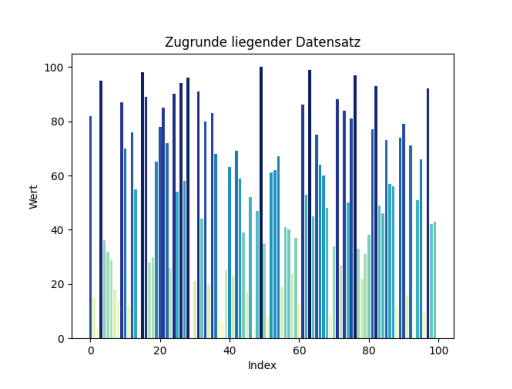

In [59]:

# Load the image
image = plt.imread('Sortieralgorithmen/dataset.png')

# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()

## Sortieralgorithmen

### Bubble Sort

**Bubble Sort**: Der Bubble Sort Algorithmus vergleicht zunächst das erste Element mit dem nächsten Element und tauscht sie bei Bedarf aus, wenn sie in der falschen Reihenfolge sind. Anschließend vergleicht er das zweite Element mit dem darauffolgenden Element und tauscht sie gegebenenfalls aus. Dieser Vorgang wird fortgesetzt, bis das vorletzte Element mit dem letzten Element verglichen wurde.

Der Algorithmus arbeitet sich in jedem Durchlauf von links nach rechts durch die Liste und tauscht benachbarte Elemente, wenn sie in der falschen Reihenfolge sind. Nach jedem Durchlauf wird das größte Element in der Liste an die richtige Position am Ende verschoben. Dieser Prozess wird so lange wiederholt, bis die gesamte Liste sortiert ist.

Der Name "Bubble Sort" kommt von der Art und Weise, wie die größten Elemente allmählich an das Ende der Liste "aufsteigen", ähnlich wie Luftblasen in Wasser aufsteigen.

In [60]:
# Bubble Sort Algorithmus
def bubble_sort(data, ):
    cnt = 0
    sorted_datasets = []
    for i in range(len(data)-1):
        for j in range(len(data)-1-i):
            # Vergleiche benachbarte Elemente und tausche sie, falls sie in der falschen Reihenfolge sind
            if data[j] > data[j+1]:
                data[j], data[j+1] = data[j+1], data[j]
            cnt += 1
        # Speichere den sortierten Datensatz nach jedem Sortierschritt
        sorted_datasets.append(data.copy())
    print(f"Anzahl der Schritte: {cnt}")
    return sorted_datasets

In [61]:
bubble_sorted_datasets = []
bubble_sorted_datasets = bubble_sort(dataset,)

Anzahl der Schritte: 4950


In [62]:

# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(bubble_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/bubble_sort")

### Insertion Sort

Der Insertion Sort Algorithmus ist ein einfacher Sortieralgorithmus, der durch das Einfügen von Elementen in eine bereits sortierte Teilsequenz eine sortierte Gesamtsequenz aufbaut. Der Algorithmus funktioniert folgendermaßen:

Der erste Schritt besteht darin, das erste Element der Liste als bereits sortierten Teil anzusehen. Das heißt, der Teil, der nur das erste Element enthält, wird als sortiert betrachtet.

Der Algorithmus geht dann das nächste Element in der Liste durch und fügt es an die richtige Position im bereits sortierten Teil ein. Dabei vergleicht es das Element mit den bereits sortierten Elementen und verschiebt größere Elemente nach rechts, um Platz für das neu eingefügte Element zu schaffen.

Dieser Schritt wird für jedes weitere Element wiederholt, bis alle Elemente in die richtige Position eingefügt wurden und die Liste vollständig sortiert ist.

Ein wichtiger Aspekt des Insertion Sort Algorithmus ist, dass er effizient für kleine Listen oder bereits teilweise sortierte Listen ist. Der Algorithmus hat eine Laufzeitkomplexität von O(n^2) im Durchschnitt und im schlimmsten Fall, was bedeutet, dass die Sortierzeit quadratisch mit der Anzahl der Elemente steigt.

Es ist wichtig zu beachten, dass Insertion Sort ein stabil sortierender Algorithmus ist, d.h. Elemente mit dem gleichen Wert bleiben in ihrer relativen Reihenfolge erhalten.

In [63]:
# Erzeuge einen zufälligen Datensatz
dataset = random.sample(range(1, n+1), n)

In [64]:
# Insertion Sort Algorithmus
def insertion_sort(data, ):
    cnt=0
    sorted_datasets = []
    for i in range(1, len(data)):
        key = data[i]  # Das aktuell zu sortierende Element
        j = i - 1
        while j >= 0 and data[j] > key:
            data[j+1] = data[j]  # Verschiebe Elemente nach rechts
            j -= 1
            cnt += 1
        data[j+1] = key  # Füge das Element an der richtigen Position ein
        # Speichere den sortierten Datensatz nach jedem Sortierschritt
        sorted_datasets.append(data.copy())
    print(f"Anzahl der Schritte: {cnt}")
    return sorted_datasets

In [65]:
insertion_sorted_datasets = []
insertion_sorted_datasets = insertion_sort(dataset)

Anzahl der Schritte: 2601


In [66]:

# Sortiere den Datensatz mit Bubble Sort
# Zeige den sortierten Datensatz nach jedem Sortierschritt
for i, data in enumerate(insertion_sorted_datasets):
    update_chart(data, i+1, "Sortieralgorithmen/insertion_sort")